# ML_TreeBasedMethods_Classification

Credits:

- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

*Inventors: Claude Shannon, Leo Breiman, Charles Stone -- authors of CART (Classification and Regression Trees)*

<img src='images/TBM0.png' width='800'>


### **Terminology**
- *Root Node* is the topmost node of the tree with minimum impurity!
- *Internal Nodes (Branches)* are the nodes with a condition in it. They arrows pointing to the and away from them.
- *Leaf (terminal) Nodes* are the nodes with the output of a condition in the parent node.
- *Pruning*: the technique of removing some of the _leaves_ by replacing them with an average of a larger number of observations, in order to avoid overfitting the training data.
- *Gini impurity* is a mathematical measurement of how “pure” the information in a data set is. In regards to classification, we can think of this as a measurement of class uniformity. Similarly, *entropy* and _information gain_ are other mathematical criteria of split.

    <img src='images/TBM2.png' width='800'>

 If the goal of a decision tree is to separate out classes as perfectly as possible, we can use gini impurity to decide on data split values. We want to minimize the gini impurity at leaf nodes.
Minimized impurity at leaf nodes means we are separating classes effectively.


There are 3 main tree based methods: Decision Tree, Random Forests and Boosted Trees. 

### 1. Decision Trees
Decision Tree Learning refers to the statistical modeling that uses a form of decision trees, where node splits are decided based on an information metric. 
- A decision tree is constructed from a training data set using Gini Impurity. The root node is the starts with the feature with the least Gini impurity value (the feature that has the ability to purify the data the best).
- By choosing the feature with the lowest resulting gini impurity in its leaf nodes, we are choosing the feature that best splits the data into “pure” classes.
- By using gini impurity as a measurement of the effectiveness of a node split, we can perform automatic feature selection by mandating an impurity threshold for an additional feature based split to occur. Hyperparameters for pruning:
    - Min gini impurity decrease
    - Min samples for split
    - Max tree depth

Decision Tree for a single (Binary) Catagorical feature:

<img src='images/TBM3.png' width='1000'>

Decision Tree for a single Continuous feature:

<img src='images/TBM4.png' width='1000'>

Decision Tree for a single (Multi) Catagorical feature:

<img src='images/TBM5.png' width='1000'>

### 2. Random Forests

*Inventor: 1995: Tin Kam Ho, 2001: Leo Breiman*

Random Forests have the ability to greatly increase the performance based on expanding ideas from the Decision Tree. Random Forests are known as ensemble learners, since they rely on an ensemble of models (multiple decision trees).

- What is the motivation behind Random Forests and how do they improve on Decision Trees? - With Gini/Rntropy impurity there is no guarantee of using all features. Root node which has huge influence over tree will always be the same. However even with all these added hyperparameter adjustments, the single decision tree is still limited:
    - Single feature for root node.
    - Splitting criteria can lead to some features not being used.
    - Potential for overfitting to data.

- Idea: create subsets of randomly picked features at each potential split. Ho and other researchers showed that adding the random feature subspace constraint could allow trees to grow much deeper without causing overfitting.

- Since a Random Forest is an ensemble of many decision trees, many of the hyperparameters between both models are shared. 

  <img src="images/RF2.png" width='800'>

- The (new) Random Forest Hyperparameters:
    - ```n_estimators=100```: How many decision trees to use total in forest? From Leo Breiman’s official page on Random Forests: “Random forests does not overfit. You can run as many trees as you want. It is fast.” After a certain number of trees, two things that can occur:
      - Different random selections don’t reveal any more information as the trees become highly correlated.
      - Different random selections are simply duplicating trees that have already been created.

    - ```max_features='auto'```: How many features to include in each subset when splitting at a node?
      - Original Publication suggested subset of $log_2(N+1)$ random features in subset given a set of N total features. 
      - Current suggested convention is $\sqrt N$
      - Breiman indicated $N/3$ may be more suitable for regression tasks
      - ISLR indicates this should be treated as a tuning parameter, with $\sqrt N$ as a good starting point.

    - ```bootstrap=True```: Allow for bootstrap sampling of each training subset of features? What is Bootstrapping? -- A term used to describe “random sampling with replacement" (mean repeated samples are allowd).
      - Recall for each split we are randomly selecting a subset of features. This random subset of features helps create more diverse trees that are not correlated to each other. To further differentiate trees, we could bootstrap a selection of rows for each split.
      - This results in two randomized training components:
        - Subset of Features Used
        - Bootstrapped rows of data
      - Bootstrapping is yet another hyperparameter meant to reduce correlation between trees, since trees are then trained on different subsets of feature columns and data rows!

    - ```oob_score=False```: Calculate *out-of-bag (OOB)* error during training? What is *BAGging* (Bootstrap Aggregated)? -- Recall to actually use a Random Forest, we use bootstrapped data and then calculate a prediction based on the aggregated prediction of the trees:
      - Classification: Most Voted Y Class
      - Regression: Average Predicted Ys
    - If we performed bootstrapping when building out trees, this means that for certain trees, certain rows of data were not used for training. *Out-of-Bag Samples* are samples not used for constructing some trees. We could use these to get performance test metrics on trees that did not use these rows!
    - Note that OOB Score is a hyperparameter that doesn’t really affect training process.
    - It is separate from bootstrapping, OOB Score is an optional way of measuring performance, an alternative to using a standard train/test split, since bootstrapping naturally results in unused data during training. Note that ```oob_score``` can only be calculated on trees that did not use the OOB data!

### 3. Boosting
_Inventors_\
_Gradient Boosting :Leo Breiman_ \
_AdaBoost :Yoav Freund, Robert Schapire_

The concept of boosting is not actually a machine learning algorithm, it is methodology applied to an existing machine learning algorithm, most commonly applied to the decision tree. And, thats the reason its called a *Meta Learning* algorithm instead of Machine Learning algorithm.

Main formula for boosting:
 
$F_T(x) = \sum_{t=1}^{T} f_t(x), \quad f_t(x) = \alpha_t h(x) $

$E_t = \sum_i E[F_{t-1}(x_i)+\alpha_t h(x_i)] $

Note $h(x)$ can in theory be any machine learning algorithm (estimator/learner), $F_T$ is the meta model, $E_t$ is the error for the $t^{th}$ slump/weak learner. 


*What is a weak learner?*\
A weak model is a model that is too simple to perform well on its own.
The weakest decision tree possible would be a **stump**, a decision tree with max_depth=1, i.e. one node and two leaves!

- ```AdaBoost``` (Adaptive Boosting) works by using an ensemble of weak learners and then combining them through the use of a weighted sum. Adaboost adapts by using previously created weak learners in order to adjust misclassified instances for the next created weak learner. Unlike a single decision tree which fits to all the data at once (fitting the data hard), AdaBoost aggregates multiple weak learners, allowing the overall ensemble model to learn slowly from the features.

  <img src="images/AdaBoost1.png" width='1000'>

  <img src="images/AdaBoost2.png" width='1000'>

  AdaBoost uses an ensemble of weak learners that learn slowly in series. Certain weak learners have more “say” in the final output than others due to the multiplied alpha parameter. Each subsequent $t$ weak learner is built using a reweighted data set from the $t-1$ weak learner.

  Intuition of Adaptive Boosting: Each stump essentially represents the strength of a feature to predict. Building these stumps in series and adding in the alpha parameter allows us to intelligently combine the importance of each feature together.

  Notes on Adaptive Boosting: Unlike Random Forest, it is possible to overfit with AdaBoost, however it takes many trees to do this. Usually error has already stabilized way before enough trees are added to cause overfitting.


- ```GradientBoost``` is a very similar idea to AdaBoost, where weak learners are created in series in order to produce a strong ensemble model the end. And agian we can use GradientBoost with other models that aren't Decision Trees, however, like AdaBoost, it just happens to work best with Decision Tress. Gradient Boosting makes use of the *residual error* for learning. 

  Gradient Boosting vs. Adaboost:
  - Larger Trees allowed (max_depth>1) in Gradient Boosting.
  - Learning Rate coefficient same for all weak learners.
  - Gradual series learning is based on training on the residuals of the previous model.

  Gradient Boosting Intuition: 
    - We optimize the series of trees by learning on the residuals, forcing subsequent trees to attempt to correct for the error in the previous trees.
    - The trade-off is training time.
    - A learning rate is between 0-1, which means a very low value would mean each subsequent tree has little “say”, meaning more trees need to be created, causing a longer computational training time.

    <img src="images/GradBoost1.png" width='1000'>









In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Decision Tree

### Data

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.

<img src="images/penguin.jpg" align='right' style="max-width:200px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. [source](doi:10.1371/journal.pone.0090081)

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist.

In [27]:
df = pd.read_csv('data/penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Feature Engineering I

In [28]:
df['species'].unique() # To be predicted (classification)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [29]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

- We have some data mising!

In [30]:
df = df[df['sex'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


- Simply dropping the rows with null for 'sex' also cleaned up the nulls for other features as well!

In [31]:
df['island'].unique(), df['sex'].unique()

(array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 array(['MALE', 'FEMALE', '.'], dtype=object))

In [32]:
df[df['sex']=='.'] # bad information

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


- We can impute the 'sex' of this penguin using a feature most correlated with 'sex' feature!

In [33]:
df_corr = df.drop(index=336)
df_corr['sex'] = df['sex'].map({'MALE':0,'FEMALE':1}).drop(index=336)

In [34]:
df_corr.corr()['sex'].abs().sort_values(ascending=False)[1:]

body_mass_g          0.424987
culmen_depth_mm      0.372673
culmen_length_mm     0.344078
flipper_length_mm    0.255169
Name: sex, dtype: float64

- So clearly, we can impute the missing 'sex' value using 'body_mass_g' feature of that particular specie which is 'Gentoo'!

In [ ]:
df[df['species']=='Gentoo'].groupby('sex').describe().T

- culmen_length_mm: close to FEMALE avg --> F
- culmen_depth_mm: close to MALE (max for FEAMLE is 15.5) --> M
- flipper_length_mm: hard to tell!
- body_mass_g: close to FEMALE -->F
- So we chose FEMALE

In [ ]:
# Using the at() method
df.at[336,'sex'] = 'FEMALE'
df.loc[336]

### EDA

In [ ]:
sns.pairplot(data=df,hue='species');

- Well separated!

In [ ]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2');

### Feature Engineering II

In [ ]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

### Classification

For Decision Tree, a tree node is going to directly compare on a single feature. Thus, scaling is not necessary as it is never going to use multiple feature at the same time.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,base_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

- One of the most important advantages of using a Decision Tree model is that its very interpretable.

#### Feature Importances

In [ ]:
# relative importance of each feature in its decesion making
pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature Imporatnce'])['Feature Imporatnce']\
            .sort_values(ascending=False)

- So the most important feature for this particular decision tree was 'flipper_length_mm'.
- The features 'sex_MALE','island_Torgersen' and 'body_mass_g' are not even considered! This is due to the way the tree was contructed with the default hyperparameters.
- So we need to push the decision tree to consider all the features!

#### Let's visualize the Decision Tree
[Online Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,3),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

- Note that the Root Node is indeed the 'flipper_length_mm' feature which is the most important feature (with a gini impurity = 0.63) for this particular Decision Tree.

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    
    print(classification_report(y_test,model_preds))
    print('\n')
    
    print(pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature Imporatnce'])['Feature Imporatnce']\
            .sort_values(ascending=False))
    print('\n')

    plt.figure(figsize=(4,3),dpi=200)
    plot_tree(model,feature_names=X.columns,filled=True);

#### Hyperparameter testing
- max depth, max leaf nodes and gini to entropy criteria
- After limiting the max possible depth, we see that some leaf nodes have non-zero gini impurity!

In [ ]:
# max leaf nodes
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

In [ ]:
# min samples split
pruned_tree = DecisionTreeClassifier(min_samples_split=51)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

In [ ]:
# entropy (information gain): changing the mathematical
# criteria of split from gini to entropy
pruned_tree = DecisionTreeClassifier(criterion='entropy')
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree) 

## 2. Random Forest

### Classification #1
Same Penguin datast as above

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, max_features='auto',
                               random_state=101)
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,base_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

### Classification #2

**Let's try out a new (large) dataset**

[Banknote Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - real and fake bills scanned and a wavelet transformation was performed on the image. Features:
- Variance of Wavelet Transformation
- Skewness of Wavelet Transformation
- Curtosis of Wavelet Transformation
- Entropy of Image

In [ ]:
df = pd.read_csv('data/data_banknote_authentication.csv')
df.sample(5)

In [ ]:
sns.pairplot(data=df,hue='Class')

- The data is very separable!

In [ ]:
X = df.drop('Class',axis=1)
y = df.Class

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.15, random_state=101)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,'max_features':max_features,
              'bootstrap':bootstrap,'oob_score':oob_score}
model = GridSearchCV(RandomForestClassifier(),param_grid)
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

In [ ]:
model.best_params_

In [ ]:
best_model = RandomForestClassifier(bootstrap=True,max_features=2,
                                    n_estimators=64,oob_score=True)
best_model.fit(X_train,y_train)
print("The OOB Score = ",best_model.oob_score_)

In [ ]:
best_model_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,best_model_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model,X_test,y_test);

- We should get the accuracy very close to the OOB Score!

In [ ]:
from sklearn.metrics import accuracy_score

errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,random_state=101,
                                 max_features=2,)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    errors.append(1-accuracy_score(y_test,preds))
    misclassifications.append(sum(preds!=y_test))


In [ ]:
plt.plot(range(1,200), errors, 'r');

In [ ]:
plt.plot(range(1,200),misclassifications,'b');

- So ```n_estimators~25``` is enough!

### Regression

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock. They have given us some lab test results of signal strength returned in *nHz* to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is.

#### Check the data

In [ ]:
df = pd.read_csv("data/rock_density_xray.csv")
df.sample(5)

In [ ]:
df.columns = ['Signal','Density']

In [ ]:
sns.scatterplot(x='Signal',y='Density',data=df);

In [ ]:
X = df.Signal.values.reshape(-1,1) # make it a 2D data
y = df.Density

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.1, random_state=101)

#### Helper Function

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def run_model(model,X_train,y_train,X_test,y_test,clr,label):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mse = mean_absolute_error(y_test,preds)
    rmse = mean_squared_error(y_test,preds,squared=False)
    print(f'MAE:  {rmse}')
    print(f'RMSE: {rmse}')

    signal_range = np.arange(0,100).reshape(-1,1)
    output = model.predict(signal_range)
    plt.figure(figsize=(5,3), dpi=100)
    sns.scatterplot(x='Signal', y='Density', data=df);
    signal_range = np.arange(0,100).reshape(-1,1)
    plt.plot(signal_range, output, c=clr, label=label);
    plt.legend();

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test,'r','LinearReg')

#### Polynomial Regression

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Pipe is just like a model
run_model(pipe,X_train,y_train,X_test,y_test,'r','PolyReg')

#### KNN

#### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000,10000],
              'gamma':['auto','scale']}
grid = GridSearchCV(svr, param_grid)
run_model(grid,X_train,y_train,X_test,y_test,'r','SVR')
print(grid.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10] # higher k implies higher bias

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test,'r','KNN')

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_leaf_nodes = [5,10,20] # higher implies higher varaince

for n in max_leaf_nodes:
    model = DecisionTreeRegressor(max_leaf_nodes=n)
    run_model(model,X_train,y_train,X_test,y_test,'r','DecisionTree')

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
run_model(model,X_train,y_train,X_test,y_test,'r','RandomForest')

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test,'r','GradBoosting')

model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test,'r','AdaBoost')

## 3. Boosting

### Data

<img src="images/mushroom.jpg" width="200" height="200" align="right">

#### Mushroom Hunting: Edible or Poisonous?

[Data Source](https://archive.ics.uci.edu/ml/datasets/Mushroom)


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
df = pd.read_csv('data/mushrooms.csv')
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2544,e,x,y,g,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,y,d
7148,p,x,y,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
6082,p,f,s,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
2890,e,x,f,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
7399,p,k,y,e,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p


- Can't really tell much w/o numbers as all the features are catagorical!
- We can use countplot() and describe()

### EDA

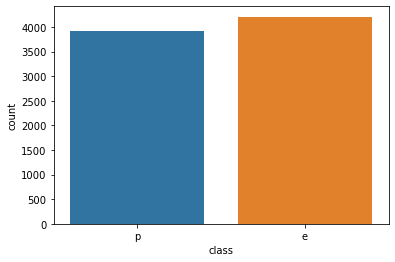

In [4]:
sns.countplot(data=df,x='class');

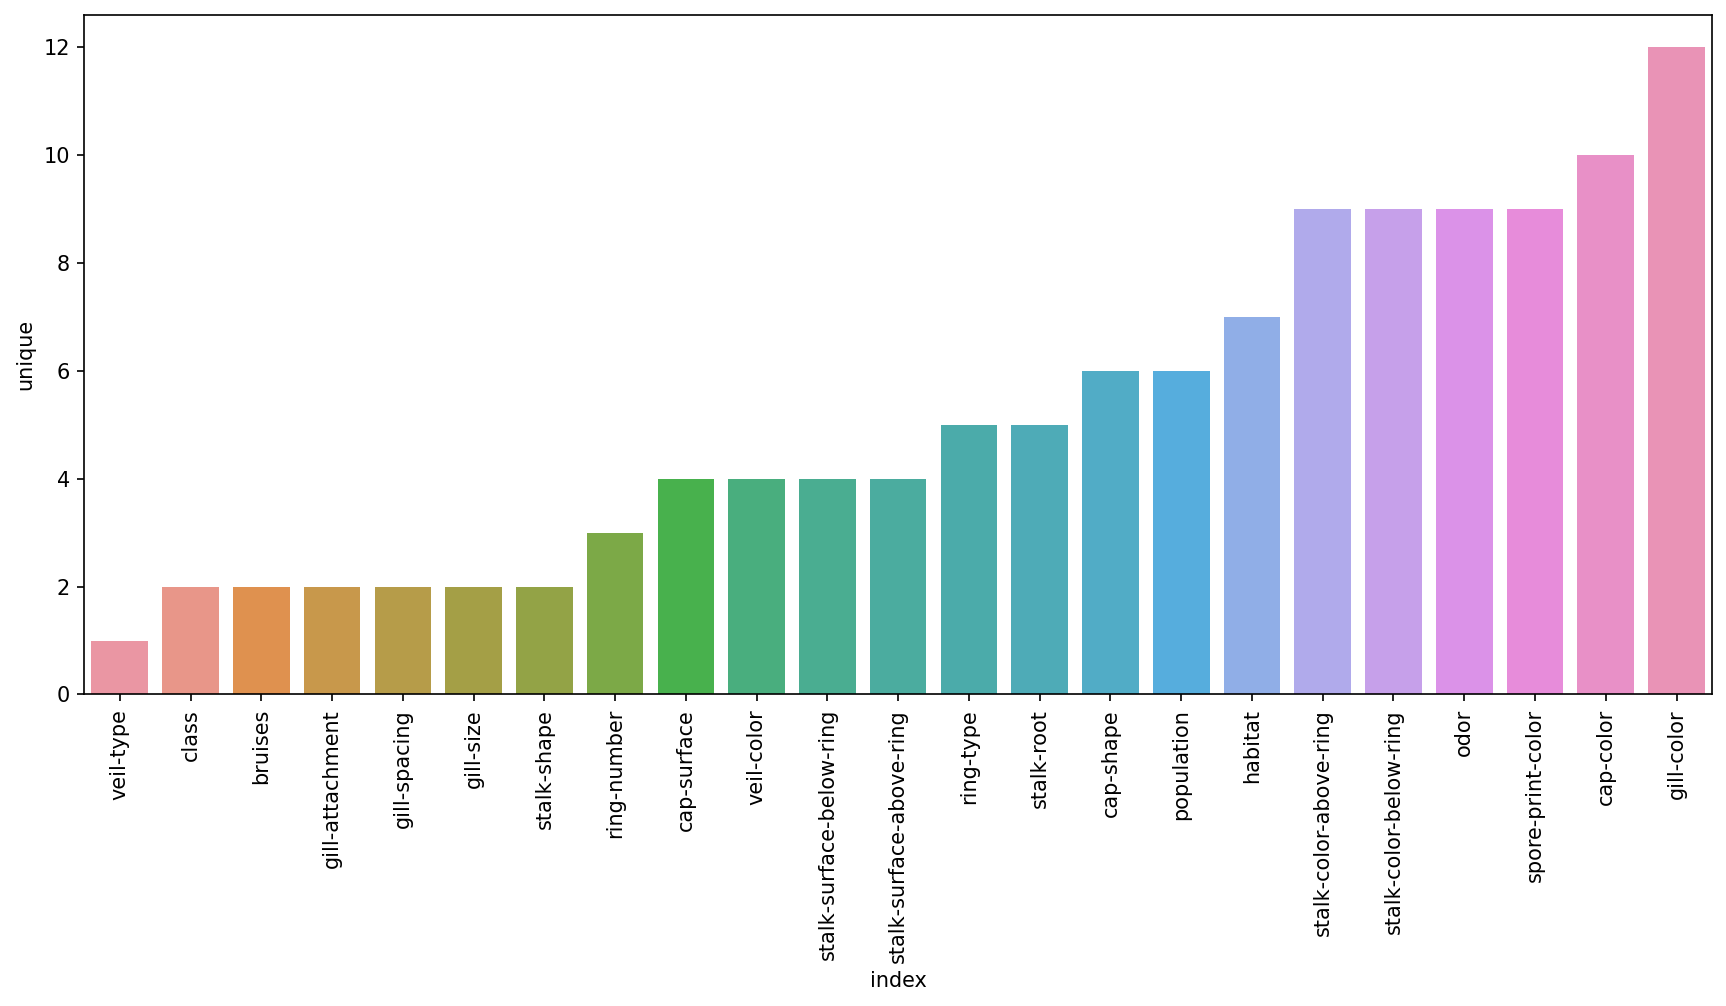

In [5]:
feat_unique = df.describe().transpose().reset_index().sort_values('unique')
plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=feat_unique,x='index',y='unique');
plt.xticks(rotation=90);

- Pretty cool method to sort and visualize the unique no. of instances over all the features!
- Very useful when the data is all catagorical!

### AdaBoost - Classification

In [6]:
X = df.drop('class', axis=1)
y = df['class']
X = pd.get_dummies(X,drop_first=True)
X.sample(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1071,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5319,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4154,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1807,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1431,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Stump model

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.15, random_state=101)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1)
# this means that the AdaBoostClassifier has to figure out the 
# single best feature to split on! 
model.fit(X_train, y_train)

from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [8]:
# most important (only) feature
X.columns[model.feature_importances_.argmax()]

'odor_n'

- odor_n referes to 'no odor' 
- With only a single stump, the model is able to get 88% accuracy just by checking if the mushroom has odor or not!

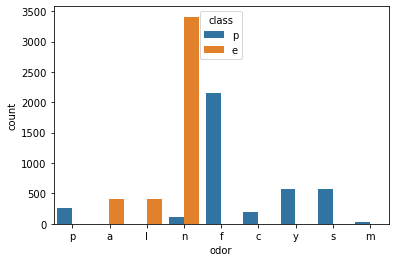

In [9]:
sns.countplot(data=df, x='odor',hue='class');

- So most of the odorless mushroom are 'edible'

#### Full AdaBoost

In [11]:
# Elbow method
error_rates = []

for n in range(1,96): # len(X.columns)=95
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rates.append(1-accuracy_score(y_test, pred))

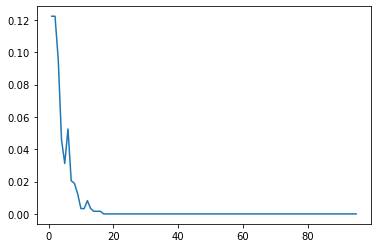

In [12]:
plt.plot(range(1,96), error_rates);

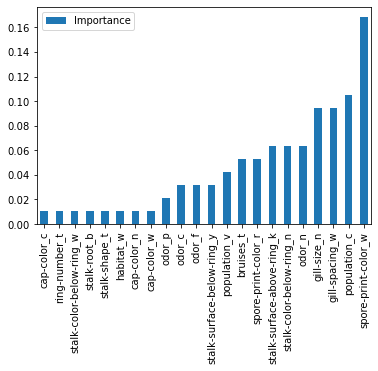

In [28]:
feat_imp_df = pd.DataFrame(index=X.columns, 
                           data=model.feature_importances_,
                           columns=['Importance'])

feat_imp_df[feat_imp_df['Importance']>0.0].sort_values('Importance')\
.plot(kind='bar');

### GradientBoost - Classification

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.05,0.1,0.2],
             'max_depth':[3,4,5]}

gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [33]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [32]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



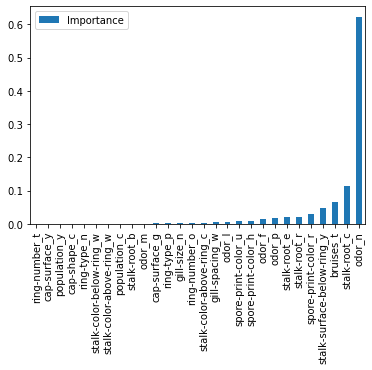

In [36]:
grid.best_estimator_.feature_importances_

feat_imp_df = pd.DataFrame(index=X.columns, 
                           data=grid.best_estimator_.feature_importances_,
                           columns=['Importance'])

feat_imp_df[feat_imp_df['Importance']>1e-4].sort_values('Importance')\
.plot(kind='bar');